In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv("Occupancy_Estimation.csv")    #reading the data
data.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [3]:
#checking the shape of the data

data.shape

(10129, 19)

In [4]:
data.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [6]:
data.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [7]:
# Convert "Date" to datetime
data["Date"] = pd.to_datetime(data["Date"])

data["Time"] = pd.to_datetime(data["Time"])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  10129 non-null  datetime64[ns]
 1   Time                  10129 non-null  datetime64[ns]
 2   S1_Temp               10129 non-null  float64       
 3   S2_Temp               10129 non-null  float64       
 4   S3_Temp               10129 non-null  float64       
 5   S4_Temp               10129 non-null  float64       
 6   S1_Light              10129 non-null  int64         
 7   S2_Light              10129 non-null  int64         
 8   S3_Light              10129 non-null  int64         
 9   S4_Light              10129 non-null  int64         
 10  S1_Sound              10129 non-null  float64       
 11  S2_Sound              10129 non-null  float64       
 12  S3_Sound              10129 non-null  float64       
 13  S4_Sound        

[Text(0.5, 1.0, 'Distribution of Room_Occupancy_Count')]

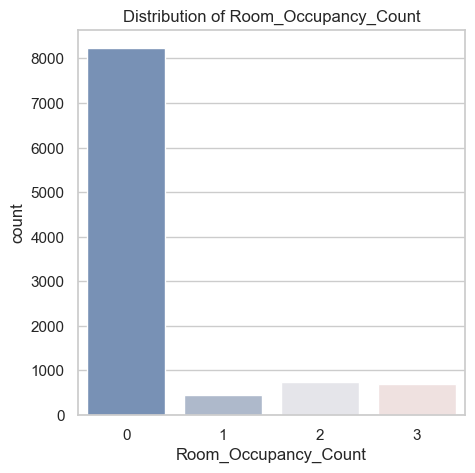

In [9]:
# check the distribution of labels - Room_Occupancy_Count
sns.set_theme(style='whitegrid',palette='vlag',rc={'figure.figsize':(5,5)})
ax = sns.countplot(x=data.Room_Occupancy_Count)
ax.set(title='Distribution of Room_Occupancy_Count')

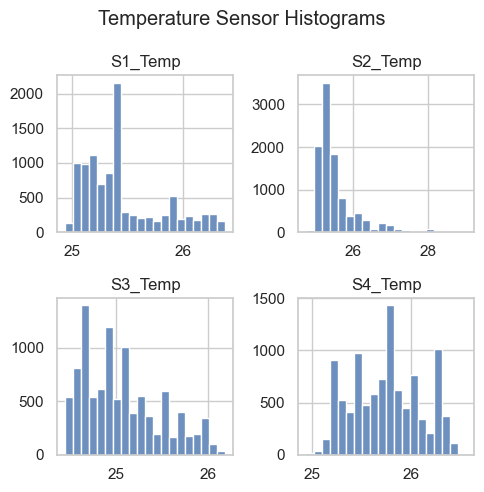

In [10]:
# Select the temperature columns
temperature_columns = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp']

# Plot separate histograms for temperature sensors
fig, axs = plt.subplots(2, 2, figsize=(5,5))
fig.suptitle('Temperature Sensor Histograms')

# Iterate over the temperature columns and plot histograms
for i, column in enumerate(temperature_columns):
    row = i // 2
    col = i % 2
    axs[row, col].hist(data[column], bins=20)
    axs[row, col].set_title(column)

plt.tight_layout()
plt.show()

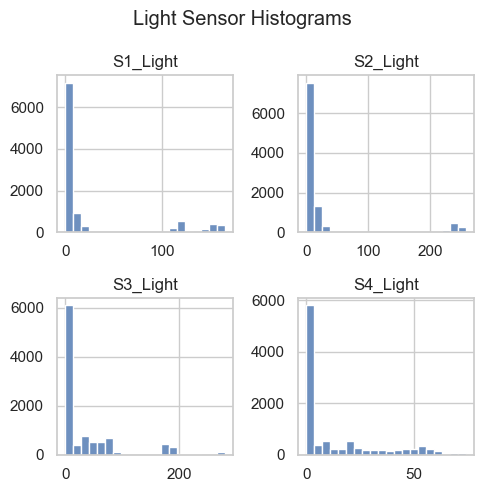

In [11]:
# Select the temperature columns
light_columns = ['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light']

# Plot separate histograms for temperature sensors
fig, axs = plt.subplots(2, 2, figsize=(5,5))
fig.suptitle('Light Sensor Histograms')

# Iterate over the temperature columns and plot histograms
for i, column in enumerate(light_columns):
    row = i // 2
    col = i % 2
    axs[row, col].hist(data[column], bins=20)
    axs[row, col].set_title(column)

plt.tight_layout()
plt.show()

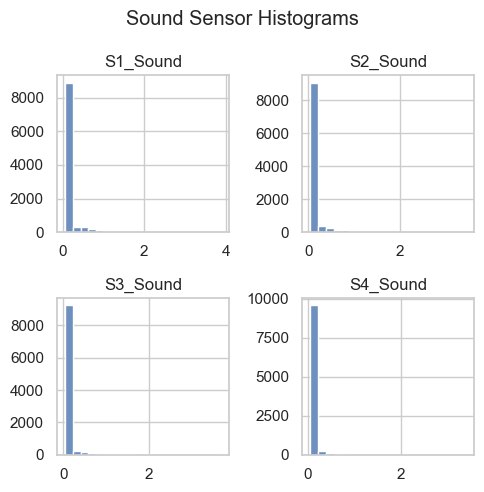

In [12]:
# Select the temperature columns
sound_columns = ['S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound']

# Plot separate histograms for temperature sensors
fig, axs = plt.subplots(2, 2, figsize=(5,5))
fig.suptitle('Sound Sensor Histograms')

# Iterate over the temperature columns and plot histograms
for i, column in enumerate(sound_columns):
    row = i // 2
    col = i % 2
    axs[row, col].hist(data[column], bins=20)
    axs[row, col].set_title(column)

plt.tight_layout()
plt.show()

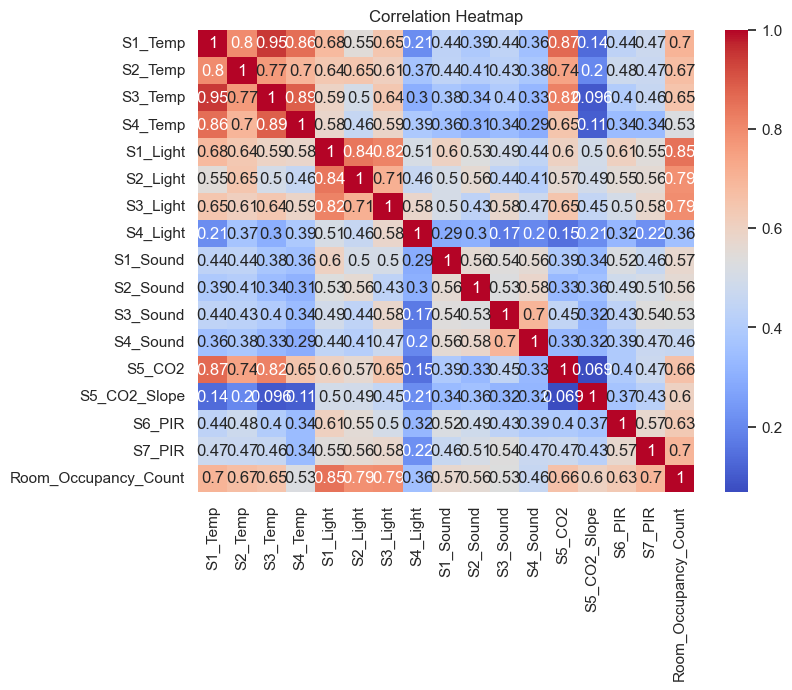

In [13]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#### While the light from sensors 3 and 4 also appears to show some association with the occupancy of the room, it appears that temperature has a substantial relationship with how many people are there.

In [14]:
# Convert datetime columns to numeric representation
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time']).dt.time

# Select all columns except the last one (Room_Occupancy_Count)
columns_to_normalize = data.columns[2:-1]  # Exclude 'Date' and 'Time' columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Print the normalized dataset
print(data.head())

        Date      Time   S1_Temp  S2_Temp   S3_Temp   S4_Temp  S1_Light  \
0 2017-12-22  10:49:41  0.000000      0.0  0.068571  0.271605  0.733333   
1 2017-12-22  10:50:12  0.000000      0.0  0.068571  0.308642  0.733333   
2 2017-12-22  10:50:42  0.041667      0.0  0.034286  0.308642  0.733333   
3 2017-12-22  10:51:13  0.041667      0.0  0.068571  0.308642  0.733333   
4 2017-12-22  10:51:44  0.041667      0.0  0.068571  0.308642  0.733333   

   S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0  0.131783  0.189286  0.540541  0.005236  0.044118  0.005510  0.002985   
1  0.127907  0.189286  0.540541  0.227749  0.002941  0.005510  0.002985   
2  0.131783  0.189286  0.540541  0.096859  0.020588  0.011019  0.002985   
3  0.131783  0.189286  0.540541  0.091623  0.017647  0.016529  0.011940   
4  0.131783  0.192857  0.540541  0.031414  0.005882  0.005510  0.002985   

     S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0  0.048649      0.462487     0.

In [15]:
# Define the columns to drop
columns_to_drop = ["Date", "Time"]

# Drop the columns
data_new = data.drop(columns_to_drop, axis=1)

In [16]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S1_Temp               10129 non-null  float64
 1   S2_Temp               10129 non-null  float64
 2   S3_Temp               10129 non-null  float64
 3   S4_Temp               10129 non-null  float64
 4   S1_Light              10129 non-null  float64
 5   S2_Light              10129 non-null  float64
 6   S3_Light              10129 non-null  float64
 7   S4_Light              10129 non-null  float64
 8   S1_Sound              10129 non-null  float64
 9   S2_Sound              10129 non-null  float64
 10  S3_Sound              10129 non-null  float64
 11  S4_Sound              10129 non-null  float64
 12  S5_CO2                10129 non-null  float64
 13  S5_CO2_Slope          10129 non-null  float64
 14  S6_PIR                10129 non-null  float64
 15  S7_PIR             

In [17]:
# Split the dataset into features (X) and target (y)
X = data_new.drop("Room_Occupancy_Count", axis=1)
y = data_new["Room_Occupancy_Count"]

In [18]:

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1619
           1       1.00      1.00      1.00       103
           2       0.99      0.90      0.94       164
           3       0.87      0.91      0.89       140

    accuracy                           0.98      2026
   macro avg       0.96      0.95      0.96      2026
weighted avg       0.98      0.98      0.98      2026



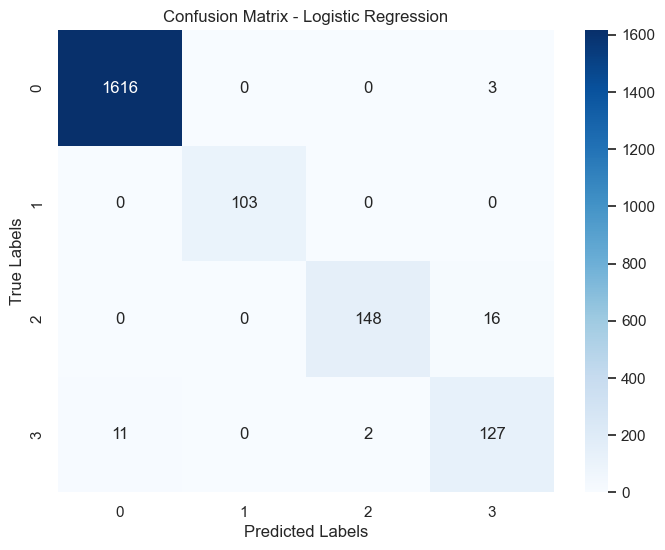

In [20]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)
logreg_report = classification_report(y_test, logreg_predictions)
print("Logistic Regression Report:")
print(logreg_report)

# Compute confusion matrix
cm_lr = confusion_matrix(y_test, logreg_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Random Forest classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.99      0.99      0.99       164
           3       0.99      0.99      0.99       140

    accuracy                           1.00      2026
   macro avg       0.99      1.00      0.99      2026
weighted avg       1.00      1.00      1.00      2026



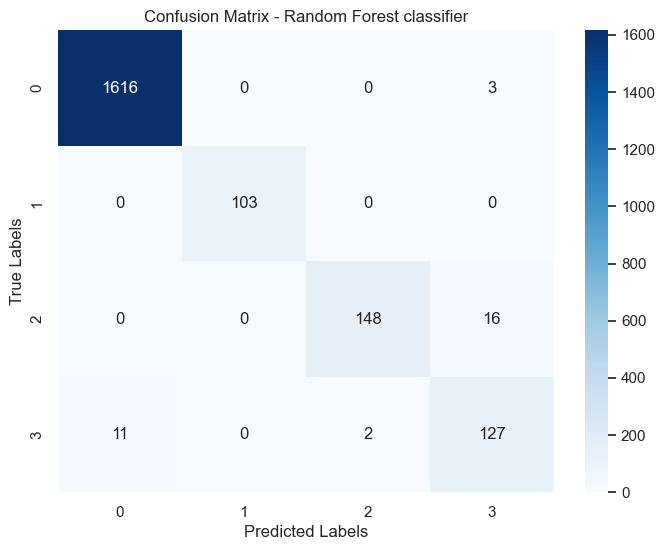

In [21]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF_predictions = RF.predict(X_test)
RF_report = classification_report(y_test, RF_predictions)
print("Random Forest classification Report:")
print(RF_report)

# Compute confusion matrix
cm_RF = confusion_matrix(y_test, RF_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Random Forest classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.96      0.98      0.97       164
           3       0.95      0.96      0.96       140

    accuracy                           0.99      2026
   macro avg       0.98      0.98      0.98      2026
weighted avg       0.99      0.99      0.99      2026



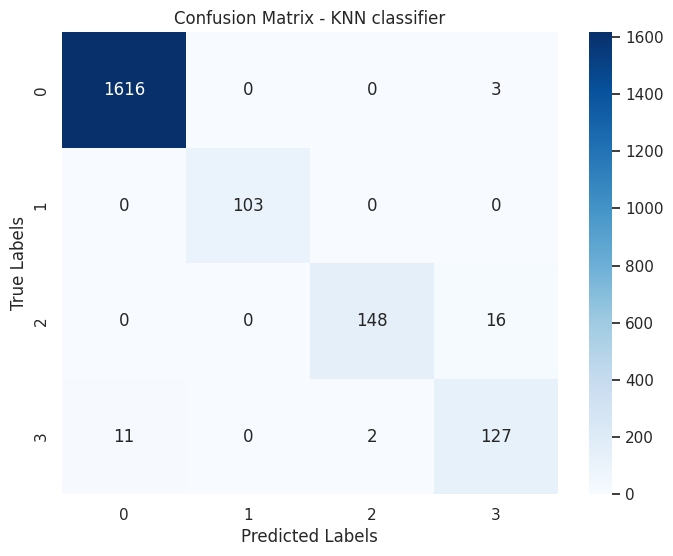

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_report = classification_report(y_test, knn_predictions)
print("KNN Classification Report:")
print(knn_report)

# Compute confusion matrix
cm_KNN = confusion_matrix(y_test, knn_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - KNN classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()